#Data Collection

## Import Modules

In [268]:
import random
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

In [269]:
# from google.colab import drive
# drive.mount('/content/drive')

##Collect Data

In [270]:
import gc

In [271]:
main_df = pd.read_csv("train_df.csv")
test_df = pd.read_csv("test_df.csv")


In [272]:
print(f"% of 0's : {main_df['target'].value_counts()[0]/len(main_df) * 100}% \n% of 1's : {main_df['target'].value_counts()[1]/len(main_df) * 100}%")

% of 0's : 93.813% 
% of 1's : 6.187%


c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

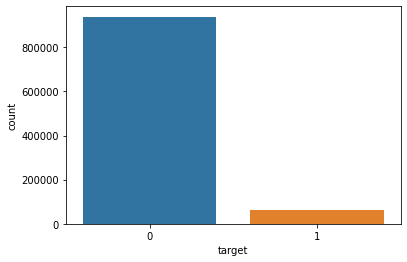

In [273]:
sns.countplot(main_df["target"])

In [274]:
main_df.head()

,qid,question_text,target
0,dda0b0efc8ba86e81ec4,What are interesting facts about Microsoft his...,0
1,dc708b74a108d0fc0ad9,What are those things which are not gonna happ...,0
2,06a27ec5d82dacd8bfe0,"What should I know to avoid being ""upsold"" whe...",0
3,00cbb6b17e3ceb7c5358,How I add any account with payment bank?,0
4,7c304888973a701585a0,Which Multi level marketing products are actua...,0


##Visualize and Interpret Data

In [275]:
# checking for missing values in training data
main_df.isna().sum()

(main_df == "?").sum()

qid              0
question_text    0
target           0
dtype: int64

In [276]:
# checking for missing values in testing data

test_df.isna().sum()

(test_df == "?").sum()

qid              0
question_text    0
dtype: int64

In [277]:
len(main_df)      #no of rows in training data

1000000

In [278]:
main_df.shape[1]         #no of columns in training data

3

In [279]:
len(test_df)      #no of rows in testing data

306122

In [280]:
test_df.shape[1]        #no of columns in testing data

2

In [281]:
main_df.nunique()

qid              1000000
question_text    1000000
target                 2
dtype: int64

In [282]:
main_df.duplicated().sum()   #checking for duplicate rows in training data


0

In [283]:
test_df.duplicated().sum()   #checking for duplicate rows in testing data


0

knowing the length of each message and showing them as a column

In [284]:
# main_df['length'] = main_df['question_text'].apply(len)

In [285]:
# main_df['length'].describe()

 In natural language processing, useless words (data), are referred to as stop words. 
  A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore.



In [286]:
# main_df.head()

In [287]:
# sns.displot(main_df['length'])

array([[<AxesSubplot:title={'center':'target'}>]], dtype=object)

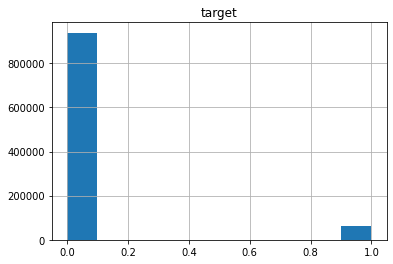

In [288]:
main_df.hist()

In [289]:
# main_df.hist(column='length',by='target')

Data Preparation

## Import Modules

In [290]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [291]:
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer        
from nltk.stem.porter import PorterStemmer  


In [292]:
# nltk.download('punkt')

In [293]:
# from sklearn.feature_extraction.text import CountVectorizer        
from nltk.stem import PorterStemmer, LancasterStemmer

In [294]:
import string
stopwords = nltk.corpus.stopwords.words('english')


In [295]:
import re
from bs4 import BeautifulSoup
# Contractions

import contractions
import string

# NLTK
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Tokenization, punctuations and stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet

# CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from nltk.probability import FreqDist
from wordcloud import WordCloud

# Lemmatization
from nltk.stem import WordNetLemmatizer



In [296]:
# !pip install symspellpy

Removing  brackets, digits

In [297]:
# def correct_spelling(text):
#     s = ''
#     misspelled = spell.unknown([w for w in str(text).split()])
#     for word in misspelled:
#         if word == None or spell.correction(word) == None:
#             pass
#         else:
#             s += spell.correction(word)
#     return s

# train_df['text'] = train_df['text'].apply(lambda s: correct_spelling(s))
# test_df['text'] = test_df['text'].apply(lambda s: correct_spelling(s)

In [298]:
# def remove_url(data_column):
#   return data_column.apply(lambda sentence: re.sub(r'https://','', sentence))
# def remove_html(data_column):
#   return data_column.apply(lambda sentence: BeautifulSoup(sentence, 'html.parser').get_text())

In [299]:

# def remove_digits(column):
#   return column.apply(lambda sentence: re.sub('[0-9]','', sentence))


# def remove_brackets(column):
#   temp = column.apply(lambda sentence: re.sub('\(.*?\)','', sentence))
#   return temp.apply(lambda sentence: re.sub('\[.*?\]','', sentence))


# def remove_underscore(column):
#   return column.apply(lambda sentence: sentence.replace("_",""))

In [300]:
# def expand_contractions(column):
#   contractions_expanded = column.apply(lambda sentence: [contractions.fix(word) for word in sentence.split()])
#   return [' '.join(map(str, word)) for word in contractions_expanded]

In [301]:
# ! pip install symspellpy

Tokenize

In [302]:
# def tokenize(column):
#   return column.apply(word_tokenize)

Lower case

In [303]:
# def lower_case(column):
#   return column.apply(lambda tokens: [word.lower() for word in tokens])

Removing punctuations

In [304]:
# def remove_punctuation(column):
#   return column.apply(lambda tokens: [re.sub(r'[^\w\s]', '', word) for word in tokens])


removing Stopwords

In [305]:
# # In natural language processing, useless words (data), are referred to as stop words. A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore.


# def remove_stopwords(column):
#   stop_words = set(stopwords.words('english'))
#   return column.apply(lambda tokens: [word for word in tokens if word not in stop_words and word])

Lemmatization

In [306]:
# def pos_tags(column):
#   return column.apply(nltk.tag.pos_tag)

In [307]:
# def get_wordnet_pos(tag):
#     if tag.startswith('J'):
#         return wordnet.ADJ
#     elif tag.startswith('V'):
#         return wordnet.VERB
#     elif tag.startswith('N'):
#         return wordnet.NOUN
#     elif tag.startswith('R'):
#         return wordnet.ADV
#     else:
#         return wordnet.NOUN

In [308]:
# def to_wordnet(column):
#   return column.apply(lambda words: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in words])
# def word_lemmatizer(column):
#   wnl = WordNetLemmatizer()
#   return column.apply(lambda words: [wnl.lemmatize(word, tag) for word, tag in words])

Function calls for preprocessing

In [309]:
# def pre_processing(data, main_df):
#   data = remove_url(data)
#   data = remove_html(data)
#   data = remove_brackets(data)
#   data = remove_digits(data)
#   data = remove_underscore(data)

#   main_df['sentences'] = expand_contractions(data)
#   data = tokenize(main_df['sentences'])
#   main_df.drop('sentences', axis='columns', inplace=True)

#   data = lower_case(data)
#   data = remove_punctuation(data)
#   data = remove_stopwords(data)

#   # data = correct_spelling(data)
#   data = pos_tags(data)
#   data = to_wordnet(data)
#   return word_lemmatizer(data)

In [310]:
nltk.download('omw-1.4')

[nltk_data] Error loading omw-1.4: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [311]:
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [WinError 10060] A connection attempt failed because
[nltk_data]     the connected party did not properly respond after a
[nltk_data]     period of time, or established connection failed
[nltk_data]     because connected host has failed to respond>


False

In [312]:
gc.collect()

26

In [313]:
# main_df["processed_data"] = pre_processing(main_df["question_text"], main_df)
# # main_df.head()

In [314]:
gc.collect()

0

In [315]:
# test_df["processed_data"] = pre_processing(test_df["question_text"], test_df)
# # test_df.head()

In [316]:
# main_df.shape, test_df.shape


In [317]:
complete_df = pd.concat([main_df, test_df])

In [318]:
complete_df.shape


(1306122, 3)

Word frequency analysis

In [319]:
def common_words(data_column, top):
  all_words = []
  data_column.apply(lambda words: all_words.extend(words))
  most_common_words = FreqDist(all_words).most_common(top)
  x, y = zip(*most_common_words)
  plt.figure(figsize=(8,6))
  plt.bar(x,y)
  plt.xticks(rotation=60)
  plt.xlabel('Words')
  plt.ylabel('Frequency of Words')
  plt.show()

In [320]:
common_words(main_df['processed_data'],30)


In [321]:
target0 = main_df[main_df['target']==0]['processed_data']
target1 = main_df[main_df['target']==1]['processed_data']


In [322]:
common_words(target0,30)


In [323]:
common_words(target1,30)


In [324]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in main_df['question_text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [325]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in main_df['question_text'][main_df['target'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [326]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in main_df['question_text'][main_df['target'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [327]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer()

# features = vectorizer.fit_transform(complete_df['question_text'])


In [328]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range = (1,3))

features = vectorizer.fit_transform(complete_df['question_text'])

In [329]:
# from sklearn.feature_extraction.text import TfidfVectorizer

In [330]:
gc.collect()

0

TFIDF vectorizer

In [331]:
# word_vect = TfidfVectorizer(strip_accents = 'unicode', ngram_range = (2, 6),
#                             analyzer = 'char', sublinear_tf = True, stop_words = 'english',
#                             min_df = 2, max_df = 0.5, max_features = 20000)
    
# char_train_features = word_vect.fit_transform(main_df['question_text'])
# char_test_features = word_vect.transform(test_df['question_text'])

In [333]:
# # TF-IDF Vectorization of words
# word_vect = TfidfVectorizer(strip_accents = 'unicode', ngram_range = (1, 2),
#                             analyzer = 'word', sublinear_tf = True, stop_words = 'english',                         
#                             min_df = 2, max_df = 0.5, max_features = 20000)

# word_train_features = word_vect.fit_transform(main_df['question_text'])
# word_test_features = word_vect.transform(test_df['question_text'])

In [335]:
# from scipy.sparse import hstack
# train_features = hstack([word_train_features , char_train_features])
# test_features = hstack([word_test_features , char_test_features])
# print(train_features.shape)

In [336]:
train_data = vectorizer.transform(main_df['question_text'])

In [337]:
test_data = vectorizer.transform(test_df['question_text'])

In [338]:
model = LogisticRegression(class_weight={0:0.4,1:0.4},max_iter=1500, solver='lbfgs', penalty = 'l2')



MLPClassifier

<!-- from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification -->

In [339]:
# model = MLPClassifier(hidden_layer_sizes=5,activation='relu', learning_rate='invscaling',random_state=50, max_iter=35)

XGBoost

In [340]:
# import xgboost as xgb

In [341]:
# model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

Decision Tree

In [342]:
# from sklearn.tree import DecisionTreeClassifier

In [343]:
# model_1 = DecisionTreeClassifier(random_state=0)

MultinomialNB

In [344]:
# model_2 = MultinomialNB(alpha=0.001)

In [345]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score

In [346]:
x_train, x_valid, y_train, y_valid = train_test_split(train_data, main_df['target'], test_size=0.001, random_state=43)

In [347]:
model.fit(x_train, y_train)

In [ ]:
# print(x_train)

In [ ]:
train_pred_prob = model.predict_proba(x_train)[:, 1]

In [ ]:
y_pred = (train_pred_prob > 0.2).astype(np.int)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_512\3378707217.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = (train_pred_prob > 0.2).astype(np.int)


In [ ]:
Accuracy_training = metrics.accuracy_score(y_train, y_pred)*100

In [ ]:
print("ACCURACY ON MY TRAINING DATA : ", Accuracy_training)


ACCURACY ON MY TRAINING DATA :  95.3569696969697


In [ ]:
f1_score(y_train, y_pred)

0.6709899076658794

test data

In [ ]:
test_pred_prob = model.predict_proba(test_data)[:, 1]


In [ ]:
y_test_pred = (test_pred_prob > 0.2).astype(np.int)
test_df['target'] = y_test_pred


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_512\375613217.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_test_pred = (test_pred_prob > 0.2).astype(np.int)


In [ ]:
test_df.drop(['question_text'], axis = 'columns', inplace=True)
test_df.to_csv("sample_submissions_final.csv", index = False)